## Homework 1 Part 2 Task 1

You will apply k-means clustering to analyze housing data <br>
In general, to do clustering, we need <br>
(1) feature vectors of objects <br>
(2) a distance measure (or a similarity measure) <br>
The result may vary if you change (1) and/or (2) <br>
In standard k-means, L2 norm based distance measure is used. <br>
Thus, k-means clustering result is largely determined by (1) <br>
In this task, you will select different sets of feature components for clustering with different goals. <br>
Also, you will observe the randomness of k-means clustering. <br>
You need to read through the instructions until you see "your work begins here" <br>
This is a guided-task: <br>
You may see the output of a code cell and then figure out the code in that cell. <br>
In each code cell, there are instructions to help you. <br>
This is a very efficient and effective way to learn how to program with sk-learn <br>
Try your best to generate similar results. However, because k-means is somewhat random, your results may be different from those provided in the file. <br>

#### First, we load the dataset
It is a table. Each row contains the information of an area in the state of california. Thus, an area in the state of california is an object in this application; a row is the "raw" feature vector of an object. Other names of a row: a data point, a data sample, an instance, an observation.

In [373]:
#we need to import the package pandas to read data files
#we give it a new name 'pd', easy to remember and use
import pandas as pd
#the table is in the file housing.csv
housing = pd.read_csv("housing.csv")
#use head function to show the first five rows
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [374]:
# type of variable 'housing' is pandas DataFrame
# it is very important to know the types of variables
# because functions may only work with specific types of variables.
type(housing)

pandas.core.frame.DataFrame

In [375]:
# get the general information of the DataFrame
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [376]:
# get some statistics
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [377]:
#check to see if there is nan in the table
#nan indicates missing value
#do not worry, in this task, we will not use total_bedrooms
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [378]:
# get one column of the DataFrame
housing['ocean_proximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [379]:
# get two columns of the DataFrame
table1=housing[['longitude', 'latitude']]
table1.head()

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [380]:
type(table1)

pandas.core.frame.DataFrame

In [381]:
# type of table1 is DataFrame
# functions in sk-learn may not work well with DataFrame
# often, we need to convert DataFrame to numpy array
table1=table1.values
type(table1)

numpy.ndarray

In [382]:
# it is a 2D array
table1.shape

(20640, 2)

In [383]:
# get an element at row-i and column-j of table1
i=1; j=0
table1[i,j]

-122.22

In [384]:
# get row-0 from table1
table1[0,:]

array([-122.23,   37.88])

In [385]:
# get column-0 from table1
table1[:,0]

array([-122.23, -122.22, -122.24, ..., -121.22, -121.32, -121.24])

For more information about numpy array, see the lecture notes

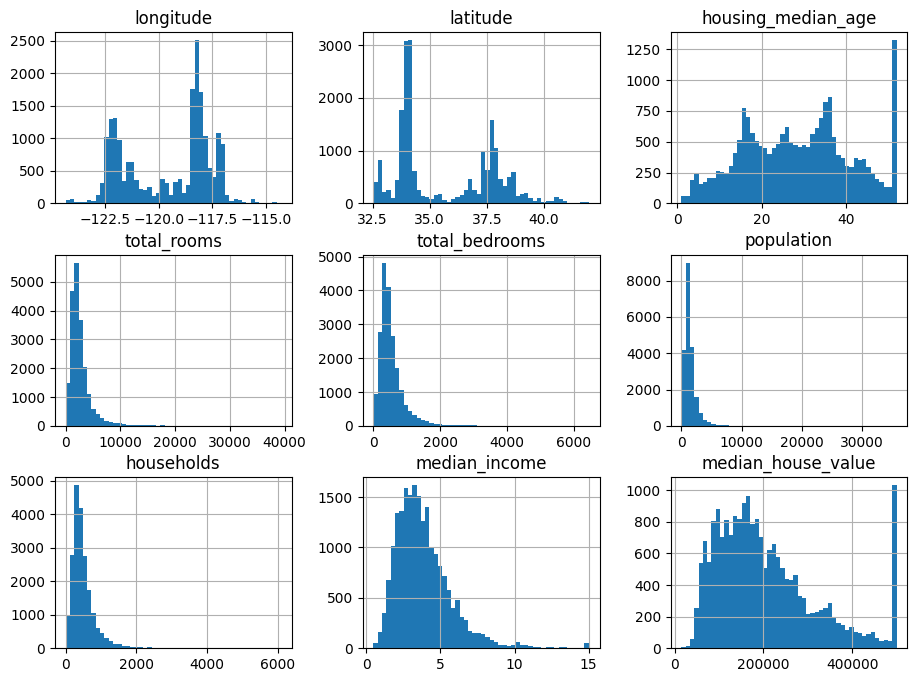

In [386]:
# show the histograms: one histogram corresponds to one column
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(11,8))
plt.show()

<Axes: >

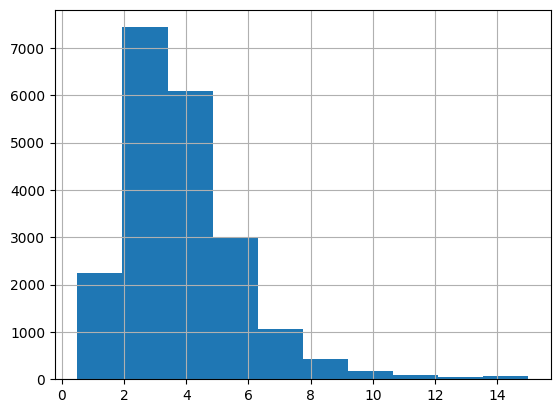

In [387]:
#show the histogram of a column
housing["median_income"].hist()

### visualize the data points using pandas buil-in funciton plot

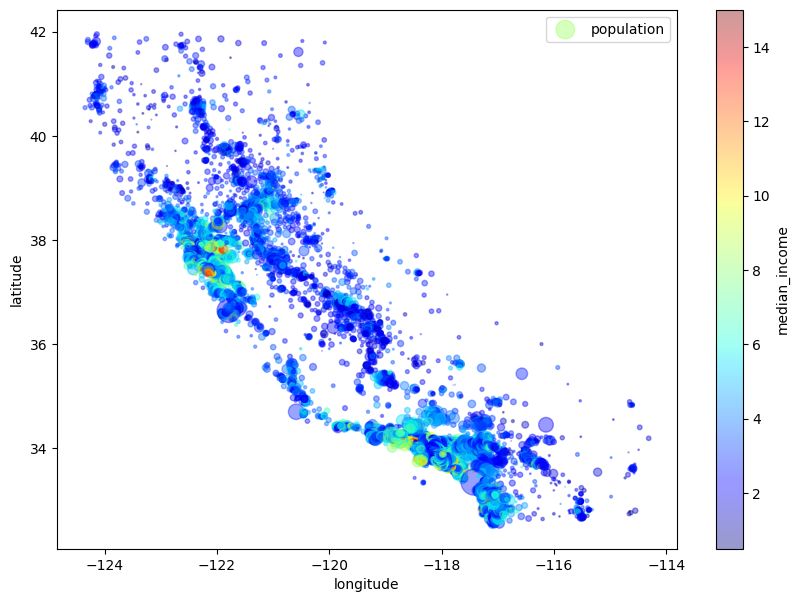

In [388]:
#each dot represents an area
#the color of a dot shows the median_income in that area
#the size of a dot shows the population in that area
housing.plot(kind="scatter", x="longitude", y="latitude",
    s=housing['population']/100, 
    label="population",
    c="median_income", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()

### visualize the data points on the map of california using matplotlib

Text(0.5, 0, 'Longitude')

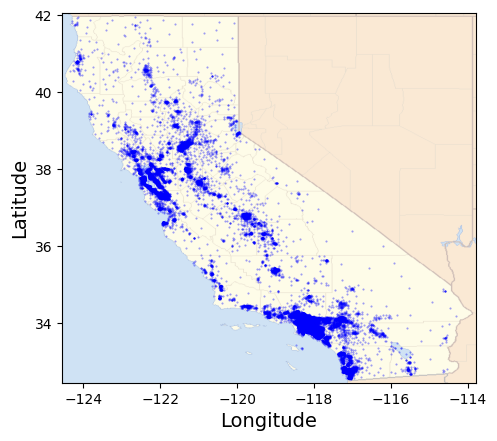

In [389]:
# the map is an image,'california.png'
# we need the function imread from the module io of the package skimage
from skimage.io import imread
#load the map
california_img=imread('california.png')
#show the map
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
#show the data points
#set the size of the dots by s=1
#set the color of the dots by color = 'b' - blue
#make the dots to be somewhat transparent by alpha=0.4
plt.scatter(x=housing['longitude'], y=housing['latitude'], 
            color='b',  marker='.', s=1, alpha=0.4)
#add labels to x-axis and y-axis and set fontsize
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

#### Handle the categorical variable "ocean_proximity"
Many machine learning algorithms only accept numerical data (numbers) not categorical data (category names). Thus, we need to convert categorical data into numerical data. <br>
In our table, we have a categorical variable "ocean_proximity". We apply one-hot encoding method (https://en.wikipedia.org/wiki/One-hot) to use numbers to represent different "ocean_proximity", which can be easily done by Pandas.

In [390]:
housing=pd.get_dummies(housing)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In the new "housing" table, we see five new columns <br>
(1) ocean_proximity_<1H OCEAN <br>
(2) ocean_proximity_INLAND <br>
(3) ocean_proximity_ISLAND <br>
(4) ocean_proximity_NEAR BAY <br>
(5) ocean_proximity_NEAR OCEAN <br>
These columns are filled with 1s and 0s by the one-hot encoding method. <br>
If 'ocean_proximity' is 'NEAR BAY' in the original table, then in the new table, 'ocean_proximity_NEAR BAY' is 1 and the other variables are 0s.

## Your work begins here
complete the following 3 sub-tasks <br>
1. cluster the data points based on locations to find out spatial clusters
2. cluster the data points to find out where high/low income people live
3. run k-means several times for sub-task-2 to see if the result is stable or not (do not fix random_state).

### 1. cluster the data points based on locations
location features: longitude, latitude, ocean_proximity <br>
you may need to covert pandas DataFrame to numpy array <br>
you need to normalize the features (e.g. MinMaxScaler in sk-learn): see the lecture notes for why you need to do this.

In [391]:
# Convert boolean one-hot encoded columns to integers (0/1)
ocean_proximity_columns = [col for col in housing.columns if col.startswith("ocean_")]
housing[ocean_proximity_columns] = housing[ocean_proximity_columns].astype(int)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [392]:
#get a new table by selecting columns related to location
#assume the name of the new table is data1
#for example:
data1 = housing[['longitude', 'latitude', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']]
data1.head()

,longitude,latitude,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,0,0,0,1,0
1,-122.22,37.86,0,0,0,1,0
2,-122.24,37.85,0,0,0,1,0
3,-122.25,37.85,0,0,0,1,0
4,-122.25,37.85,0,0,0,1,0


In [393]:
#type of data1 is DataFrame
#convert DataFrame to numpy array
import numpy as np

data1 = np.array(data1)
data1


array([[-122.23,   37.88,    0.  , ...,    0.  ,    1.  ,    0.  ],
       [-122.22,   37.86,    0.  , ...,    0.  ,    1.  ,    0.  ],
       [-122.24,   37.85,    0.  , ...,    0.  ,    1.  ,    0.  ],
       ...,
       [-121.22,   39.43,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [-121.32,   39.43,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [-121.24,   39.37,    0.  , ...,    0.  ,    0.  ,    0.  ]])

In [394]:
#normalize data1 using MinMaxScaler in sk-learn
#assume that data1n is the name of the normalized data1 
#    data1 -> normlaization -> data1n
#use fit_transform of MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data1n = scaler.fit_transform(data1)

In [395]:
data1n.shape

(20640, 7)

In [396]:
#run k-means on data1n
#set n_clusters to 3
#read the docmument of k-means on sk-learn website
#assume the cluster labels are stored in the array label1

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=200)

kmeans.fit(data1n)
label1 = kmeans.labels_

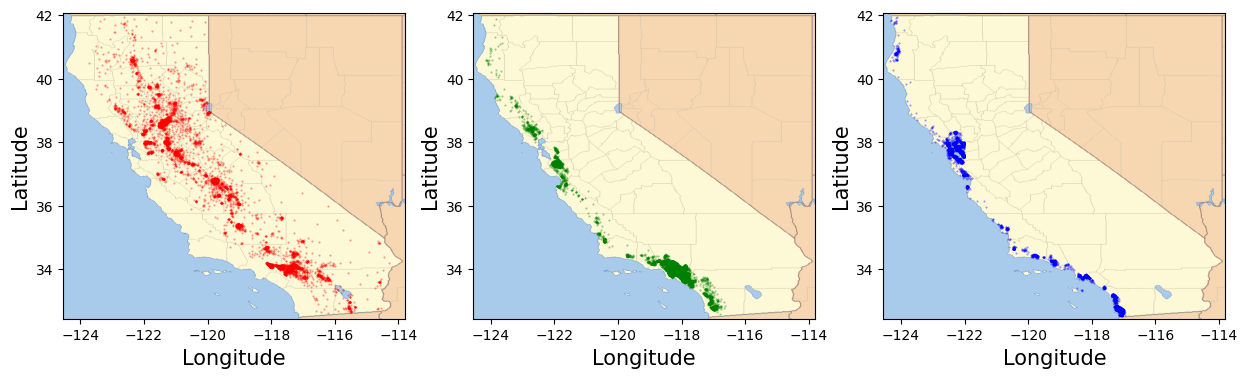

In [397]:
#plot the histogram of cluster labels in label1
#show the clusters using different colors
#you can choose a color in ['r', 'g', 'b', 'm', 'c', 'y']
#code to get the data points in cluster-k
#cluster_k=data1[label1==k]
#assume 'longitude' is in column-0 of data1
#code to get longitude values of the data points in cluster-k
#longitude_k=data1[label1==k, 0]
# sample code is here, assuming three clusters
color=['r', 'g', 'b', 'm', 'c', 'y']
fig, ax = plt.subplots(1,3, figsize=(15,8))
for k in range(0, 3):
   ax[k].imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.9)
   ax[k].scatter(x=data1[label1==k,0], y=data1[label1==k,1], 
                 color=color[k],  marker='.', s=1, alpha=0.4)
   ax[k].set_ylabel("Latitude", fontsize=15)
   ax[k].set_xlabel("Longitude", fontsize=15)

### 2. cluster data to find out where high/low income people live
think about which columns of housing are needed for this sub-task <br>
use at lease two features <br>
use features related to income and location

In [398]:
import pandas as pd

correlation_matrix = housing.corr()  # Compute correlation matrix
median_house_value_corr = correlation_matrix["median_house_value"].sort_values(ascending=False)
print(median_house_value_corr)

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64


In [399]:
import pandas as pd

correlation_matrix = housing.corr()  # Compute correlation matrix
median_income_corr = correlation_matrix["median_income"].sort_values(ascending=False)
print(median_income_corr)

median_income                 1.000000
median_house_value            0.688075
total_rooms                   0.198050
ocean_proximity_<1H OCEAN     0.168876
ocean_proximity_NEAR BAY      0.056197
ocean_proximity_NEAR OCEAN    0.027344
households                    0.013033
population                    0.004834
total_bedrooms               -0.007723
ocean_proximity_ISLAND       -0.009228
longitude                    -0.015176
latitude                     -0.079809
housing_median_age           -0.119034
ocean_proximity_INLAND       -0.237496
Name: median_income, dtype: float64


In [400]:
#select some columns from housing
#assume the name of the new table is data2

data2 = housing[['longitude', 'latitude', 'median_income', 'median_house_value', 'ocean_proximity_<1H OCEAN']]
data2

,longitude,latitude,median_income,median_house_value,ocean_proximity_<1H OCEAN
0,-122.23,37.88,8.3252,452600.0,0
1,-122.22,37.86,8.3014,358500.0,0
2,-122.24,37.85,7.2574,352100.0,0
3,-122.25,37.85,5.6431,341300.0,0
4,-122.25,37.85,3.8462,342200.0,0
...,...,...,...,...,...
20635,-121.09,39.48,1.5603,78100.0,0
20636,-121.21,39.49,2.5568,77100.0,0
20637,-121.22,39.43,1.7000,92300.0,0
20638,-121.32,39.43,1.8672,84700.0,0


In [401]:
#type of data2 is DataFrame
#convert DataFrame to numpy array

data2 = np.array(data2)
data2

array([[-1.2223e+02,  3.7880e+01,  8.3252e+00,  4.5260e+05,  0.0000e+00],
       [-1.2222e+02,  3.7860e+01,  8.3014e+00,  3.5850e+05,  0.0000e+00],
       [-1.2224e+02,  3.7850e+01,  7.2574e+00,  3.5210e+05,  0.0000e+00],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+00,  9.2300e+04,  0.0000e+00],
       [-1.2132e+02,  3.9430e+01,  1.8672e+00,  8.4700e+04,  0.0000e+00],
       [-1.2124e+02,  3.9370e+01,  2.3886e+00,  8.9400e+04,  0.0000e+00]])

In [402]:
#normalize data2 using MinMaxScaler
#assume that data2n is the name of the normlaized data2
# data2 >MinMaxScaler-> data2n

data2n = scaler.fit_transform(data2)
data2n

array([[0.21115538, 0.5674814 , 0.53966842, 0.90226638, 0.        ],
       [0.21215139, 0.565356  , 0.53802706, 0.70824656, 0.        ],
       [0.21015936, 0.5642933 , 0.46602805, 0.69505074, 0.        ],
       ...,
       [0.31175299, 0.73219979, 0.08276438, 0.15938285, 0.        ],
       [0.30179283, 0.73219979, 0.09429525, 0.14371281, 0.        ],
       [0.30976096, 0.72582359, 0.13025338, 0.15340349, 0.        ]])

In [403]:
#run k-means on data2n to get cluster labels
#you can try to set n_clusters to 6
#assume the cluster labels are stored in the array label2

kmeans = KMeans(n_clusters=6)
kmeans.fit(data2n)
label2 = kmeans.labels_
label2

array([4, 4, 4, ..., 2, 2, 2])

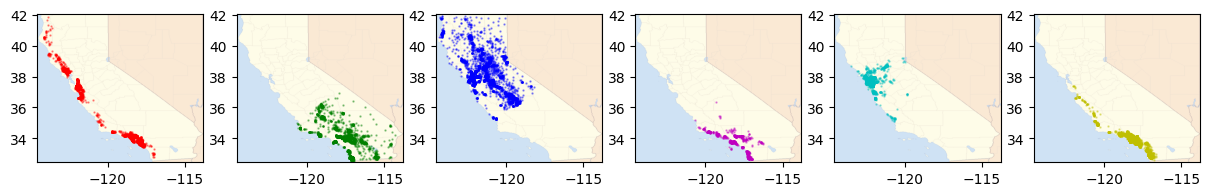

In [404]:
color=['r', 'g', 'b', 'm', 'c', 'y']
fig, ax = plt.subplots(1,6, figsize=(15,8))
for k in range(0, 6):
   ax[k].imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
   ax[k].scatter(x=data2[label2==k,0], y=data2[label2==k,1], 
                 color=color[k],  marker='.',s=2, alpha=0.4)

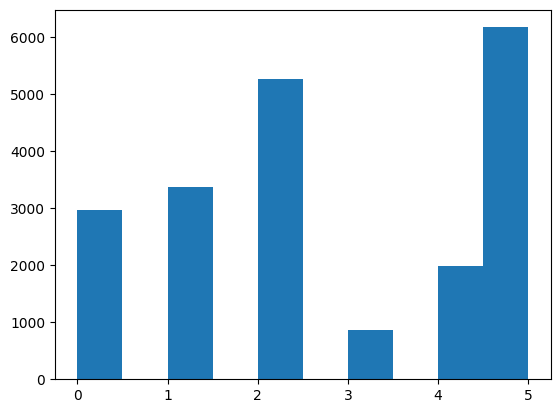

In [405]:
#plot the histogram of cluster labels
# use plt.hist(...)

plt.hist(label2)
plt.show()

In [406]:
# compute the average value of 'median_income' in each cluster
# print out the average values
mi=housing['median_income'].values
for k in range(6):
    mi_k=mi[label2==k]
    mi_k_mean=mi_k.mean()
    print(mi_k_mean)

5.552494030354131
3.0458710308056873
2.9703853996582494
5.567440276179518
5.2576071285140555
3.595586647220872


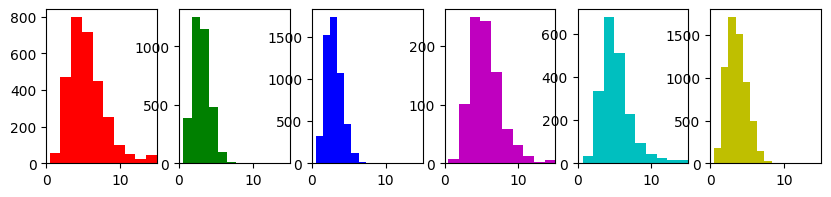

In [407]:
# show the histograms of 'median_income' in each cluster
# sample code 

color=['r', 'g', 'b', 'm', 'c', 'y']
fig, ax = plt.subplots(1,6, figsize=(10,2))
for k in range(0, 6):    
    ax[k].hist(x=data2[label2==k,2], color=color[k], bins=10)
    ax[k].set_xlim(0, 15) 

we can clearly see some clusters of high-income people

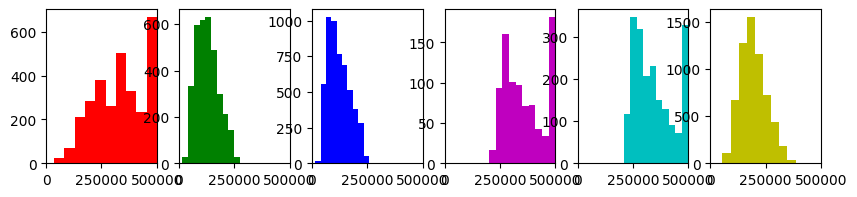

In [408]:
# show the histogram of 'median_house_value' in each cluster
# you may need to use housing to get median_house_value
# color=['r', 'g', 'b', 'm', 'c', 'y']
# mhv=housing['median_house_value'].values
# then you can use the sample code in the above cell

mhv=housing['median_house_value'].values

color=['r', 'g', 'b', 'm', 'c', 'y']

fig, ax = plt.subplots(1,6, figsize=(10,2))
for k in range(0, 6): 
    ax[k].hist(x=data2[label2==k,3], color=color[k], bins=10)
    ax[k].set_xlim(0, 500000) 

Some people have low income but live in very expensive houses